# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in Scikit-Learn. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the dataset and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).<br>

In [2]:
# Your code here:
diabetes = sklearn.datasets.load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
# Your code here:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
type(diabetes)

sklearn.utils.Bunch

In [5]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
# Your code here:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [7]:
# Enter your answer here:
'''
1) There are 11 attributes in total in which 11th one is the target column. Explanation of each att-
ribute is shared above. except age,sex and body mass they are mostly about proteins in our blood.

2) I believe, we will try to predict 'target' by training our data.

3) There are 442 participants in total (rows) and 11 features which makes around 4800 records.
'''


"\n1) There are 11 attributes in total in which 11th one is the target column. Explanation of each att-\nribute is shared above. except age,sex and body mass they are mostly about proteins in our blood.\n\n2) I believe, we will try to predict 'target' by training our data.\n\n3) There are 442 participants in total (rows) and 11 features which makes around 4800 records.\n"

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [8]:
# Your code here:
data = pd.DataFrame(data=np.c_[diabetes['data'],diabetes['target']],
             columns = diabetes['feature_names'] + ['target'])
data
# Looks all OK with the given description above.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [9]:
# Your code here:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [10]:
# Your code here:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [11]:
# Your code here:

y = data['target']
X = data.drop('target',axis=1)

data_X_train = X[:-20]
data_X_test = X[-20:]

data_y_train = y[:-20]
data_y_test = y[-20:]

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [12]:
# Your code here:
fit = diabetes_model.fit(data_X_train,data_y_train)
print("Intercept: ",diabetes_model.intercept_)
print("Coefficients: ",diabetes_model.coef_)

Intercept:  152.76430691633442
Coefficients:  [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [13]:
# Your code here:
y_pred = diabetes_model.predict(data_X_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [14]:
# Your code here:
res = pd.DataFrame({"actual":data_y_test,"predicted":y_pred})
res

,actual,predicted
422,233.0,197.618469
423,91.0,155.439793
424,111.0,172.886651
425,152.0,111.535373
426,120.0,164.800548
427,67.0,131.069549
428,310.0,259.122378
429,94.0,100.479352
430,183.0,117.060105
431,66.0,124.305036


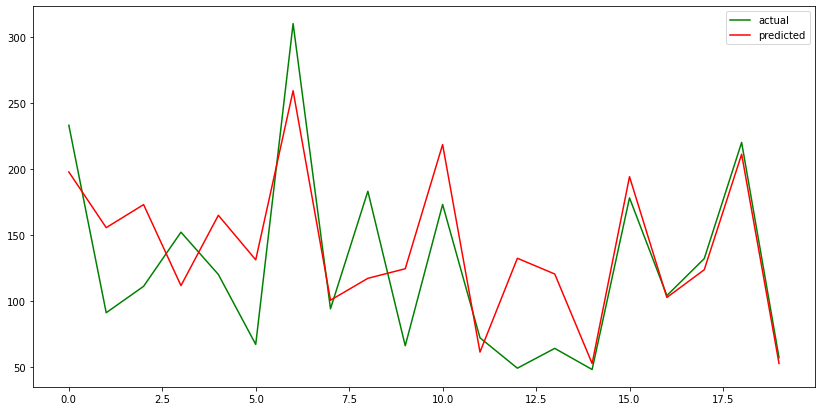

In [15]:
# plotting actual and predicted values

plt.rcParams["figure.figsize"] = (14,7)
plt.plot(np.arange(len(res)),res["actual"],color="green",label="actual")
plt.plot(np.arange(len(res)),res["predicted"],color="red",label="predicted")
plt.legend()

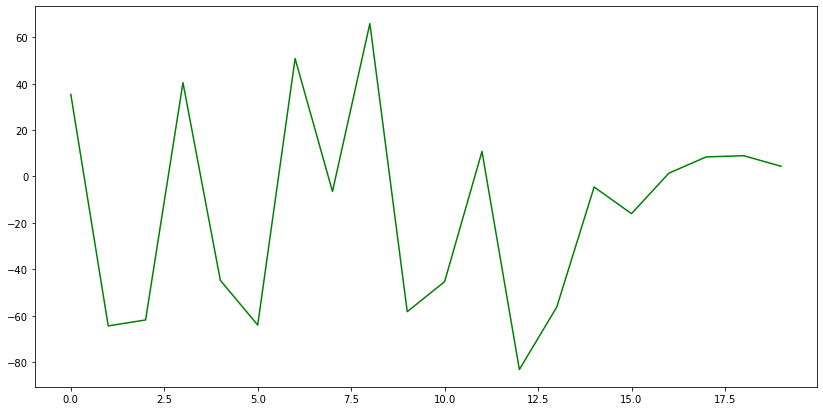

In [16]:
# plotting difference between actual and predicted values. I liked it so much, it provides
# so many insights, thanks greatly Paolo!
plt.plot(np.arange(len(res)),(res["actual"]-res["predicted"]),color="green",label="actual")

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [17]:
# Your explanation here:
# No it's not but there are pretty close values as well, by looking it I'd say accuracy score is 
# around 60-70%.  But since there are more than one variable exists as feautres, instead of R-square
# we have to interpret adjusted R-Square to interpret model performance? Or am i wrong?

# following is to check r2

from sklearn.metrics import r2_score
print("Our model score is: ",r2_score(data_y_test,y_pred))

# Well our model's performance is only 58% which is not good imo. Unless I didn't do anything wrong,
# this model is not a good model to predict target values.

Our model score is:  0.5850753022690571


# Bonus Challenge - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://online.stat.psu.edu/stat501/lesson/6) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like [this](https://drive.google.com/file/d/1rm0HdzpTjbX73IjelKJDtu4EcnhPKAsq/view?usp=sharing)

In [18]:
# Your code here:
from scipy import stats
import statsmodels.api as sm

y = data['target']
X = data.drop('target',axis=1)

data_X_train = X[:-20]
data_X_test = X[-20:]

data_y_train = y[:-20]
data_y_test = y[-20:]

data_X_train = sm.add_constant(data_X_train)

model = sm.OLS(data_y_train,data_X_train)
results = model.fit()
predictions = results.predict(data_X_train)
print('The r-squared score of our model is:', r2_score(data_y_train, predictions))

# Well r-squared results are different with above calculations (the one with  done by using Linear
# Regression from Sklearn rather than OLS.)

The r-squared score of our model is: 0.5122262147793502


In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           4.64e-58
Time:                        20:40:20   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.0

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [20]:
# Your answers here:
# F-value = 43.16, the higher the F value means the lower the P-value which means we can surely
# reject null hypothesis in this case. That means at least one of our variables' coefficient is 
# significantly different than zero.

# As discussed, age looks like don't have much affect on our model, as well as its p value is much
# higher than 0.05

# Other than that p vbalue for s1,s3,s4 and s6 are very high which makes them insignificant.

# To improve the model, I will exclude them later and expecting to see adj. r2 not changed much.

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

Download the `auto-mpg.csv` file from [here](https://drive.google.com/file/d/1kePQ667p4pRSm5ML_ulsQJTaJCZNzVJG/view?usp=sharing) and load it in the next cell by assigning it to a variable called `auto`.

In [21]:
# Your code here:
auto = pd.read_csv("../data/auto-mpg.csv",sep=",")

Look at the first 5 rows using the `head()` function:

In [22]:
# Your code here:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [23]:
# Your code here:
auto.info()
# All looks good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


What is the newest model year and the oldest model year?

In [24]:
# Your code here:
auto["model_year"].unique()
oldest = auto["model_year"].min()
newest=auto["model_year"].max()

In [25]:
print(f"Oldest model year is {oldest}")
print(f"Newest model year is {newest}")

Oldest model year is 70
Newest model year is 82


Check the dataset for missing values and remove all rows containing at least one missing value.

In [26]:
# Your code here:
auto.isna().sum()
# There are only 6 missing values in horse power

# dropping rows
auto.dropna(inplace=True)

# checking again
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [27]:
# Your code here:
auto.cylinders.unique()
auto["cylinders"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [28]:
# Your code here:
auto.drop(columns="car_name",inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
y = auto["mpg"]
X = auto.drop(columns="mpg")

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [30]:
# Your code here:
auto_model = LinearRegression()
auto_model.fit(X_train, y_train)

LinearRegression()

# Bonus Challenge - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](https://online.stat.psu.edu/stat501/lesson/1/1.5/1.5.2).

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [31]:
# Your code here:
y_pred = auto_model.predict(X_train)
pd.DataFrame({"actual":y_train,"predicted":y_pred})
# Looks quite good

,actual,predicted
156,16.0,11.547806
189,15.5,16.690738
179,22.0,22.896059
305,28.4,28.068337
266,30.0,30.404965
...,...,...
213,13.0,16.051515
136,16.0,14.006902
397,31.0,30.340255
187,17.5,14.936720


In [32]:
print(f"Performance of our model is {r2_score(y_train,y_pred)}")

Performance of our model is 0.8204892667359291


#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [33]:
# Your code here:
y_test_pred = auto_model.predict(X_test)

Text(0.5, 1.0, 'Difference graph')

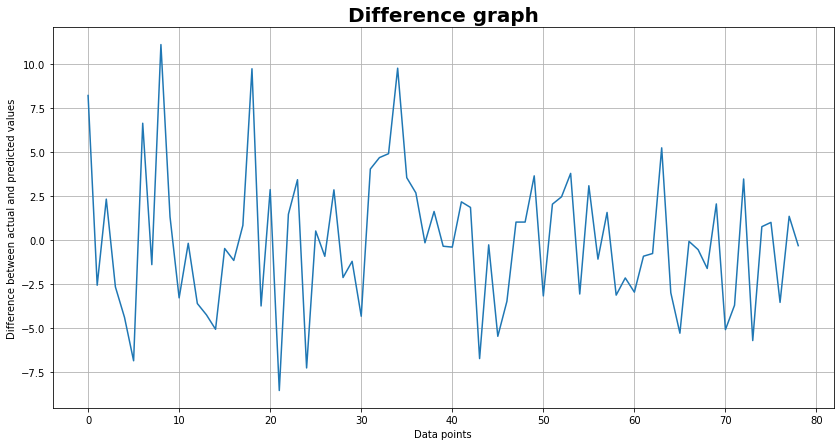

In [34]:
compare = pd.DataFrame({"actual":y_test,"predicted":y_test_pred})
plt.plot(np.arange(len(compare)),(compare["actual"]-compare["predicted"]))
plt.grid(True)
plt.xlabel("Data points")
plt.ylabel("Difference between actual and predicted values")
plt.title("Difference graph",size=20,fontweight="bold")

In [35]:
print(f"Performance of our model on training data is {r2_score(y_train,y_pred)}")
print(f"Performance of our model on test data is {r2_score(y_test,y_test_pred)}")

Performance of our model on training data is 0.8204892667359291
Performance of our model on test data is 0.7627023428034642


#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [36]:
# Your code here:

y = auto["mpg"]
X = auto.drop(columns="mpg")

X_train09, X_test09, y_train09, y_test09 = train_test_split(X,y,test_size=0.1)


Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [37]:
# Your code here:
auto_model09 = LinearRegression()
auto_model09.fit(X_train09,y_train09)

LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

In [38]:
# Your code here:
y_pred09 = auto_model09.predict(X_train09)
compare = pd.DataFrame({"actual":y_train09,"predicted":y_pred09})
compare.sample(10)

,actual,predicted
340,25.8,29.599310
322,46.6,32.049636
51,30.0,25.511949
266,30.0,30.294870
215,13.0,18.193705
288,18.2,20.053731
321,32.2,31.058628
332,29.8,33.808163
89,15.0,15.802239
1,15.0,14.169233


In [39]:
y_test_pred09 = auto_model09.predict(X_test09)
compare = pd.DataFrame({"actual":y_test09,"predicted":y_test_pred09})
compare.sample(10)

,actual,predicted
137,13.0,10.679279
52,30.0,25.542628
394,44.0,33.603476
337,32.4,30.922486
253,20.5,23.755286
97,18.0,20.297282
278,31.5,31.298643
264,18.1,23.270180
73,13.0,13.045552
240,30.5,29.227430


Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [40]:
# Your code here:
print(f"Performance of our model on test data is {r2_score(y_test09, y_test_pred09)}")

# Yes! However our performance in our training data reduced a bit but i believe this small difference
# is caused by test_train_sample function since it takes variables randomly from dataset.

Performance of our model on training data is 0.8068754257207998
Performance of our model on test data is 0.8159440867832695


# Bonus Challenge - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [42]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [52]:
# Your code here:

rfe = RFE(auto_model, n_features_to_select=3)

Fit the model and print the ranking

In [53]:
# Your code here:
rfe.fit(X_train,y_train)
rfe.ranking_

array([1, 3, 4, 2, 1, 1])

In [54]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [69]:
# Your code here:
# since ranking 4 (means lowest ranking) is displacement column, i will drop it.

y= auto["mpg"]
X = auto.drop(columns=["mpg","displacement"])

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [75]:
X

,horse_power,weight,acceleration,model_year
0,130.0,3504,12.0,70
1,165.0,3693,11.5,70
2,150.0,3436,11.0,70
3,150.0,3433,12.0,70
4,140.0,3449,10.5,70
...,...,...,...,...
393,86.0,2790,15.6,82
394,52.0,2130,24.6,82
395,84.0,2295,11.6,82
396,79.0,2625,18.6,82


In [71]:
# Your code here: 
X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced = train_test_split(X,y,train_size=0.8)
auto_model_reduced = LinearRegression()
auto_model_reduced.fit(X_train_reduced,y_train_reduced)
y_reduced_pred = auto_model_reduced.predict(X_train_reduced)

In [72]:
print(f"Performance of our reduced model on training data is {r2_score(y_train_reduced, y_reduced_pred)}")

Performance of our reduced model on training data is 0.8192908172731668


In [73]:
# Dropping cyclinders as well since its ranking is also 3 (least important after 4)
y= auto["mpg"]
X = auto.drop(columns=["mpg","cylinders","displacement"])
X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced = train_test_split(X,y,train_size=0.8)
auto_model_reduced = LinearRegression()
auto_model_reduced.fit(X_train_reduced,y_train_reduced)
y_reduced_pred = auto_model_reduced.predict(X_train_reduced)
print(f"Performance of our reduced model on training data is {r2_score(y_train_reduced, y_reduced_pred)}")

# Well, even though I excluded cylinders (whoose ranking was 3), there was a little drop in our 
# R2 score, is that normal?

# Found some comments on it in same scenario so I guess that's normal: 
'''
Although, R² decreased from 85% to 83% the model is more robust with a positive 
cross-validation result. 
'''

Performance of our reduced model on training data is 0.8063962887648329


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.